In [2]:
import numpy as np
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 1000000)
pd.set_option('display.max_rows', 1000000)




In [3]:
data = pd.read_table('Fsatellites.tsv', encoding = "ISO-8859-1")
print(data.shape)

for col in data.columns:
    if 'Unnamed' in col:
        del data[col]
        
for col in data.columns:
    if 'Source' in col:
        del data[col]

#data = data.fillna(data.min())
#pd.unique()
data['Expected Lifetime']

(1381, 254)


0              NaN
1          15 yrs.
2          15 yrs.
3          15 yrs.
4          12 yrs.
5          15 yrs.
6          15 yrs.
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12         14 yrs.
13         14 yrs.
14             NaN
15             NaN
16             NaN
17          2 yrs.
18          2 yrs.
19             NaN
20          3 yrs.
21          3 yrs.
22             NaN
23             NaN
24             NaN
25         15 yrs.
26         15 yrs.
27          2 yrs.
28             NaN
29          3 yrs.
30          3 yrs.
31             NaN
32          3 yrs.
33           1 yr.
34             NaN
35         15 yrs.
36          5 yrs.
37         15 yrs.
38         15 yrs.
39         15 yrs.
40         15 yrs.
41         15 yrs.
42         15 yrs.
43         15 yrs.
44         15 yrs.
45         15 yrs.
46         15 yrs.
47         15 yrs.
48         15 yrs.
49         15 yrs.
50         15 yrs.
51         15 yrs.
52         1

In [4]:
data.columns.values

array(['Name of Satellite, Alternate Names', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments'], dtype=object)

In [5]:
data.columns=['name', 'country_reg', 'country', 'owner', 'users',
              'purpose', 'description', 'CLO', 'TOO', 'longitude',
              'perigee_km', 'apogee_km', 'eccentricity', 'inclination', 
              'period_minutes', 'launch_mass', 'dry_mass', 'power_watts',
              'launch_date', 'expected_lifetime_years', 'contractor', 
              'contractor_country', 'launch_site', 'launch_vehicle',
              'COSPAR', 'NORAD', 'comments']
#int(data['power'].replace(',', ''))
#data['power'].replace(',', '').convert_objects(convert_numeric=True,)
#data['power']


In [6]:
data_NoC = data.replace(to_replace=',', value='', regex=True)
data_NoC['expected_lifetime_years'] = data_NoC['expected_lifetime_years'].replace(to_replace="(yrs\.|yr\.|hrs\.|trs)", value='', regex=True)
data_NoC['expected_lifetime_years'] = data_NoC['expected_lifetime_years'].replace(to_replace="\.?[0-9]*-", value='', regex=True)
data_NoC['expected_lifetime_years'] = data_NoC['expected_lifetime_years'].replace(to_replace="\+", value='', regex=True)
pd.unique(data_NoC['expected_lifetime_years'])

array([nan, '15 ', '12 ', '14 ', '2 ', '3 ', '1 ', '5 ', '10 ', '14', '8 ',
       '7 ', '1.5 ', '13 ', '6 ', '.5 ', '9 ', '18 ', '16 ', '.25 ', '11 ',
       '15  ', '17 ', '30 ', '14.5 ', '7.25 ', ' 3 ', '4 ', '11.5 ',
       '7.5 ', '2.5 ', '12.6 '], dtype=object)

In [7]:

data['expected_lifetime_years'].isnull().sum()

428

In [8]:
data_NoC['expected_lifetime_years'].isnull().sum()

428

In [9]:
data_converted = data_NoC.convert_objects(convert_dates=True, convert_numeric=True,)
data = data_converted
data

/Users/ianssmith/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


,name,country_reg,country,owner,users,purpose,description,CLO,TOO,longitude,perigee_km,apogee_km,eccentricity,inclination,period_minutes,launch_mass,dry_mass,power_watts,launch_date,expected_lifetime_years,contractor,contractor_country,launch_site,launch_vehicle,COSPAR,NORAD,comments
0,AAUSat-5 (Aalborg University Cubesat 5),NR (12/15),Denmark,Aalborg University,Civil,Communications,Automatic Identification System (AIS),LEO,Non-Polar Inclined,0.00,395,409,0.001030,51.64,92.60,1,NaN,NaN,10/2/2015,NaN,Aalborg University,Denmark,International Space Station,Nanorack Deployer,1998-067GZ,40948,Main goal is to test a AIS receiver built by s...
1,ABS-2 (Koreasat-8 ST-3),NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,35778,35793,0.000178,0.08,1436.03,6330,NaN,16000.00,2/6/2014,15.00,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,32 C-band 51 Ku-band and 6 Ka-band transponder...
2,ABS-3 (Agila 2 Mabuhay 1),Philippines,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,146.06,35769,35802,0.000391,0.05,1436.07,3775,1800,9000.00,8/19/1997,15.00,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901,Most powerful telecommunications satellite in ...
3,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-3.00,35788,35803,0.000178,0.10,1436.00,2000,NaN,NaN,3/2/2015,15.00,Boeing Satellite Systems,NaN,Cape Canaveral,Falcon 9,2015-010A,40424,Coverage of Americas Europe and Africa.
4,ABS-4 (ABS-2i MBSat Mobile Broadcasting Satell...,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.00,35780,35793,0.000154,0.01,1436.10,4143,1700,7400.00,3/13/2004,12.00,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184,Purchased by ABS in 2013.
5,ABS-6 (ABS-1 LMI-1 Lockheed Martin-Intersputni...,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,159.00,35777,35794,0.000202,0.01,1436.08,2894,1730,NaN,9/26/1999,15.00,Lockheed Martin,USA,Baikonur Cosmodrome,Proton,1999-053A,25924,28 C-band 16 Ku-band; business services public...
6,ABS-7 (Koreasat 3 Mugungwha 3),South Korea,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,116.18,35780,35791,0.000130,0.01,1436.06,3500,1800,4800.00,9/4/1999,15.00,Lockheed Martin Astro Space,USA,Guiana Space Center,Ariane,1999-046A,25894,30 Ku-band 6 Ka-band; Korean peninsula the Jap...
7,Advanced Orion 2 (NROL 6 USA 139),USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,NaN,-14.50,35560,36013,0.005370,7.72,1436.14,4500,NaN,NaN,5/9/1998,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IVA,1998-029A,25336,ELINT.
8,Advanced Orion 3 (NROL 19 USA 171),USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,NaN,95.40,35589,35984,0.004680,3.20,1436.10,4500,NaN,NaN,9/9/2003,NaN,TRW Space and Electronics,USA,Cape Canaveral,Titan IV,2003-041A,27937,Electronic intelligence (ELINT).
9,Advanced Orion 4 (NRO L-26 USA 202),USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,NaN,44.00,35714,35937,0.002640,2.89,1438.80,5000,NaN,NaN,1/18/2009,NaN,National Reconnaissance Laboratory (?),USA,Cape Canaveral,Delta 4 Heavy,2009-001A,33490,ELINT.


In [10]:
data['expected_lifetime_years'].isnull().sum()

428

In [11]:
pd.unique(data.expected_lifetime_years)

array([   nan,  15.  ,  12.  ,  14.  ,   2.  ,   3.  ,   1.  ,   5.  ,
        10.  ,   8.  ,   7.  ,   1.5 ,  13.  ,   6.  ,   0.5 ,   9.  ,
        18.  ,  16.  ,   0.25,  11.  ,  17.  ,  30.  ,  14.5 ,   7.25,
         4.  ,  11.5 ,   7.5 ,   2.5 ,  12.6 ])

In [12]:
datatypes = data.columns.to_series().groupby(data.dtypes).groups
datatypes

{dtype('int64'): ['perigee_km', 'apogee_km', 'NORAD'],
 dtype('float64'): ['longitude',
  'eccentricity',
  'inclination',
  'period_minutes',
  'launch_mass',
  'dry_mass',
  'power_watts',
  'expected_lifetime_years'],
 dtype('O'): ['name',
  'country_reg',
  'country',
  'owner',
  'users',
  'purpose',
  'description',
  'CLO',
  'TOO',
  'launch_date',
  'contractor',
  'contractor_country',
  'launch_site',
  'launch_vehicle',
  'COSPAR',
  'comments']}

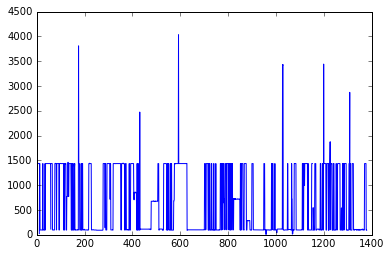

In [13]:
plt.plot(data['period_minutes'])




In [14]:
data['period_minutes'].mean()

643.1505886627888

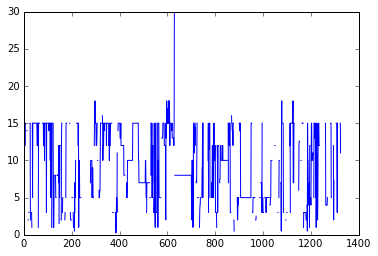

In [15]:
plt.plot(data['expected_lifetime_years'])



In [16]:
data['expected_lifetime_years'].mean()

9.530115424973769

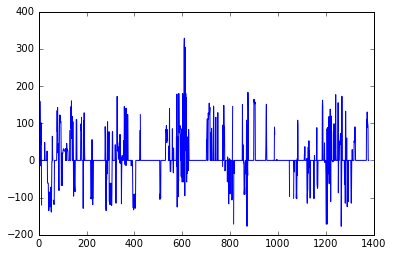

In [17]:
plt.plot(data['longitude'])



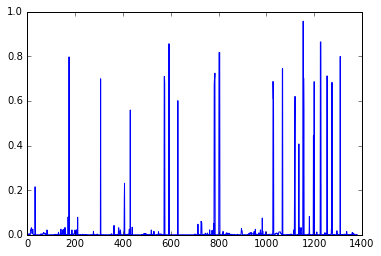

In [18]:
plt.plot(data['eccentricity'])



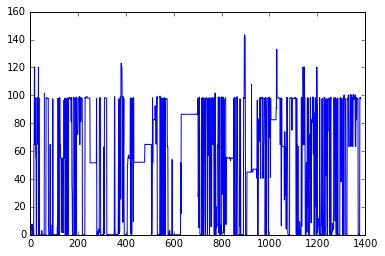

In [19]:
#plt.plot(data['power'])
plt.plot(data['inclination'])


In [20]:
data['inclination'].mean()

50.00025436046514

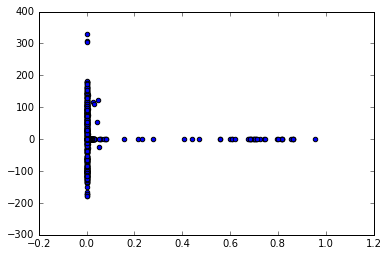

In [21]:
plt.scatter(data['eccentricity'], data['longitude'])



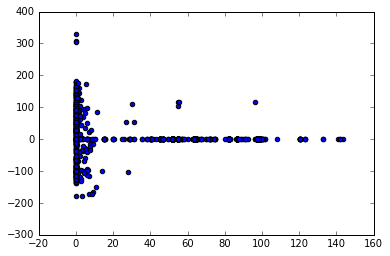

In [22]:
plt.scatter(data['inclination'], data['longitude'])

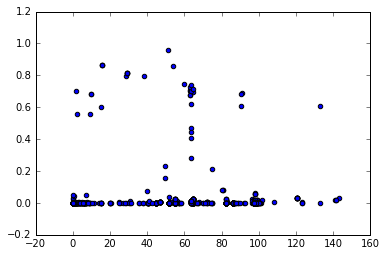

In [23]:
plt.scatter(data['inclination'], data['eccentricity'])

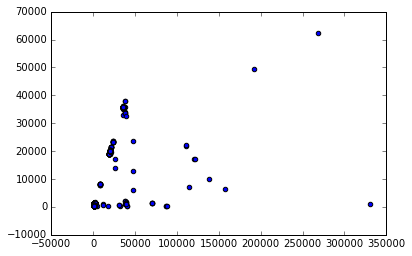

In [24]:
plt.scatter(data['apogee_km'], data['perigee_km'])

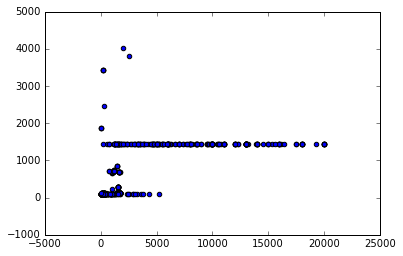

In [25]:
plt.scatter(data['power_watts'], data['period_minutes'])

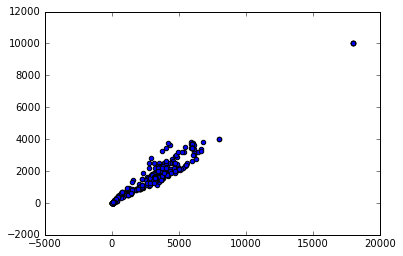

In [26]:
plt.scatter(data['launch_mass'], data['dry_mass'])

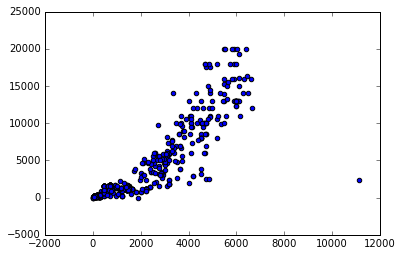

In [27]:
plt.scatter(data['launch_mass'], data['power_watts'])

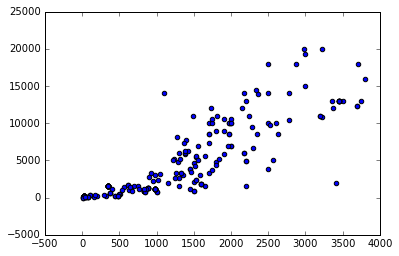

In [28]:
plt.scatter(data['dry_mass'], data['power_watts'])

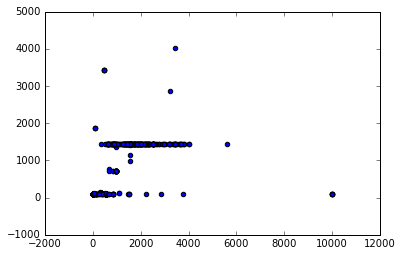

In [29]:
plt.scatter(data['dry_mass'], data['period_minutes'])

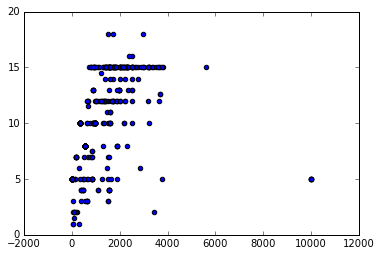

In [30]:
plt.scatter(data['dry_mass'], data['expected_lifetime_years'])

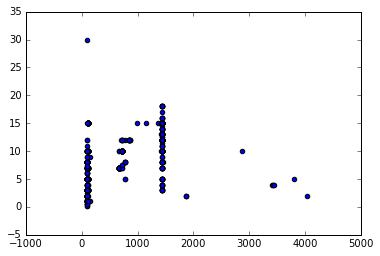

In [31]:
plt.scatter(data['period_minutes'], data['expected_lifetime_years'])

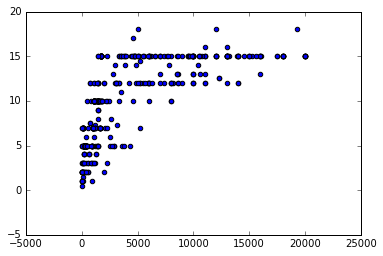

In [32]:
plt.scatter(data['power_watts'], data['expected_lifetime_years'])

In [33]:
data.to_csv('CSatellites.csv')

In [34]:
pd.unique(data['CLO'])

array(['LEO', 'GEO', 'MEO', 'Elliptical', 'LEO '], dtype=object)

In [35]:
data['CLO'].value_counts()

LEO           758
GEO           493
MEO            92
Elliptical     37
LEO             1
Name: CLO, dtype: int64

In [36]:
pd.unique(data['TOO'])

array(['Non-Polar Inclined', nan, 'Equatorial', 'Polar', 'Sun-Synchronous',
       'Elliptical', 'Deep Highly Eccentric', 'Molniya', 'Cislunar'], dtype=object)

In [37]:
data['TOO'].value_counts()

Sun-Synchronous          345
Non-Polar Inclined       310
Polar                    156
Equatorial                28
Molniya                   15
Elliptical                11
Deep Highly Eccentric      9
Cislunar                   1
Name: TOO, dtype: int64

In [38]:
pd.unique(data['longitude'])
data['longitude'].value_counts()


 0.00      897
 55.00       5
 28.20       4
 83.00       3
 50.00       3
 95.00       3
-114.90      3
 25.00       3
 118.00      3
 140.00      3
-61.00       3
 91.50       2
 90.00       2
 47.50       2
-67.60       2
 48.00       2
 98.00       2
 26.00       2
-61.50       2
-58.00       2
 180.00      2
 60.00       2
-116.80      2
 70.00       2
 25.50       2
 85.00       2
 74.00       2
 75.00       2
 105.50      2
 164.00      2
-103.00      2
-107.30      2
 110.00      2
-7.00        2
 146.06      2
-1.00        2
 36.00       2
-171.00      2
-8.00        1
 183.00      1
-30.00       1
 23.50       1
 160.00      1
 145.00      1
 144.50      1
 143.05      1
-34.04       1
 142.00      1
 138.04      1
-99.08       1
-15.00       1
 179.94      1
 16.25       1
 172.06      1
 159.00      1
 128.50      1
 28.21       1
 156.06      1
 166.00      1
 169.00      1
 9.27        1
 148.00      1
 154.00      1
 152.05      1
 19.22       1
 176.72      1
 178.20   

In [39]:
pd.unique(data['inclination'])
data['inclination'].value_counts(sort=True)


86.40     66
0.01      61
0.02      52
0.03      48
52.00     39
0.05      37
0.04      37
97.80     32
0.00      32
0.07      29
82.50     29
0.06      29
98.20     27
97.90     27
45.00     24
97.99     23
55.00     21
63.40     21
47.00     17
98.00     16
97.46     16
51.60     16
0.08      15
64.78     14
0.10      14
98.10     13
0.09      12
97.50     12
51.64     12
97.70     11
98.70     10
64.60     10
98.40      9
64.80      9
98.50      9
120.30     9
0.12       8
97.98      8
98.60      7
97.40      7
97.30      6
72.00      6
6.00       5
99.10      5
98.30      5
64.77      5
54.90      5
14.98      5
82.40      5
98.90      5
40.51      5
97.47      5
97.60      5
98.21      4
0.13       4
97.31      4
98.03      4
20.00      4
51.65      4
55.10      4
98.16      4
82.49      4
98.80      3
83.00      3
51.99      3
97.42      3
40.50      3
98.04      3
0.11       3
29.00      3
15.70      3
63.38      3
64.82      3
97.48      3
97.87      3
98.02      3
97.35      2

In [41]:

#data['inclination'].max()
max(data.apogee_km)

330000

In [42]:
max(data.perigee_km)

62200

In [43]:
min(data.apogee_km)

322

In [44]:
min(data.perigee_km)

200